In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import scipy
import tabulate
from  matplotlib.ticker import FuncFormatter
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
from indic_transliteration import sanscript


sns.set_style("whitegrid")
pd.set_option("styler.format.decimal", ",")
pd.set_option("styler.format.precision", 2)
pd.set_option("styler.format.na_rep", "–")
pd.set_option("mode.chained_assignment", None)
cm = "YlOrRd"#sns.color_palette("blend:white,green", as_cmap=True)

subdirectory = Path("assets")

subdirectory.mkdir(exist_ok=True)

SIGNIFICANCE = 0.01

# use χ² (not fisher exact) because of large sample size
chi2_p = lambda contingency: scipy.stats.chi2_contingency(contingency)[1]

def write_figure(the_name):
    plt.savefig(subdirectory / f"figure-{the_name}.svg")

def write_table(df, the_name, caption="", heatmap=False, axis=None):
    with (subdirectory / f"table-{the_name}.tex").open(mode="w") as f:
        f.write(
            (
                df.style if not heatmap else df.style.background_gradient(axis=axis, cmap=cm)
            ).highlight_null(props="background-color:white; color:white;").to_latex(
                convert_css=True, 
                hrules=True, 
                environment="longtable", 
                position="!hbt", 
                caption=caption, 
                label="tbl:"+the_name
            )
        )

In [2]:
df = pd.read_csv("./mahabharata.csv").rename(columns={
    "parvan": "Parvan",
    "adhyaya": "Adhyāya",
    "shloka": "Śloka",
    "pada": "Pāda",
    "type": "Art",
    "text": "Text",
    "syllables": "Silben",
    "syllables_symbols": "Silbenschema",
    "lengths": "Quantitäten + Wortgrenzen"
})

In [3]:
df

,Parvan,Adhyāya,Śloka,Pāda,Art,Text,Silben,Silbenschema,Quantitäten + Wortgrenzen
0,1,1,0,a,Verse,nArAyaNaM namaskRtya naraM caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,VC.VC.vC.vC C.vC.vCC.vCC.v C.vC.vC C.VC.v C.vC...,GGLG.LGGL.LG.GL.LGLL
1,1,1,0,c,Verse,devIM sarasvatIM caiva tato jayam udIrayet,ev.IM s.ar.asv.at.IM c.aiv.a t.at.o j.ay.am .u...,VC.VC C.vC.vCC.vC.VC C.VC.v C.vC.V C.vC.vC .vC...,GG.LGLG.GL.LG.LL.LGLG
2,1,1,1,A,Prose,lomaharSaNaputra ugrazravAH sUtaH paurANiko na...,om.ah.arS.aN.ap.utr.a .ugr.azr.av.AH s.Ut.aH p...,VC.vC.vCC.vC.vC.vCC.v .vCC.vCC.vC.VC C.VC.vC C...,GLGLLGL.GGLG.GG.GGLG.GLGGG.GLGL.LLLG.GLLGLG.GG
3,1,1,2,a,Verse,samAsInAn abhyagacchad brahmarSIn saMzitavratAn,am.As.In.An .abhy.ag.acch.ad br.ahm.arS.In s.a...,vC.VC.VC.VC .vCC.vC.vCC.vC CC.vCC.vCC.VC C.vCC...,LGGG.GLGG.GGG.GLGLG
4,1,1,2,c,Verse,vinayAvanato bhUtvA kadA cit sUtanandanaH,in.ay.Av.an.at.o bh.Utv.A k.ad.A c.it s.Ut.an....,vC.vC.VC.vC.vC.V C.VCC.V C.vC.V C.vC C.VC.vC.v...,LLGLLG.GG.LG.G.GLGLL
...,...,...,...,...,...,...,...,...,...
158497,18,5,52,c,Verse,khyAtAv ubhau ratnanidhI tathA bhAratam ucyate,At.Av .ubh.au r.atn.an.idh.I t.ath.A bh.Ar.at....,VC.VC .vC.V C.vCC.vC.vC.V C.vC.V C.VC.vC.vC .v...,GG.LG.GLLG.LG.GLL.GLG
158498,18,5,53,a,Verse,mahAbhAratam AkhyAnaM yaH paThet susamAhitaH,ah.Abh.Ar.at.am .Akhy.An.aM y.aH p.aTh.et s.us...,vC.VC.VC.vC.vC .VCC.VC.vC C.vC C.vC.VC C.vC.vC...,LGGLL.GGG.G.LG.LLGLL
158499,18,5,53,c,Verse,sa gacchet paramAM siddhim iti me nAsti saMzayaH,a g.acch.et p.ar.am.AM s.iddh.im .it.i m.e n.A...,v C.vCC.VC C.vC.vC.VC C.vCC.vC .vC.v C.V C.VCC...,L.GG.LLG.GL.LL.G.GL.GLL
158500,18,5,54,a,Verse,dvaipAyanoSThapuTaniHsRtam aprameyaM; puNyaM p...,aip.Ay.an.oSTh.ap.uT.an.iHs.Rt.am .apr.am.ey.a...,VC.VC.vC.VCC.vC.vC.vC.vCC.vC.vC .vCC.vC.VC.vC/...,GGLGLLLGLL.GLGL; GG.LGL.LL.GLLG.LG.L


In [4]:
df["Quantitäten + Wortgrenzen"] = df["Quantitäten + Wortgrenzen"].apply(
    lambda x: x.replace("G", "–").replace("L", "⏑")
)
df["Quantitäten"] = df["Quantitäten + Wortgrenzen"].apply(
    lambda x: x.replace(".", "")
)
df["Stelle"] = df.apply(
    lambda x: "{}.{}.{}{}".format(x["Parvan"], x["Adhyāya"], x["Śloka"], x["Pāda"]), 
    axis=1
)
df["Text"] = df["Text"].apply(
    lambda x: transliterate(x, sanscript.HK, sanscript.IAST)
)
df = df.set_index("Stelle")

In [5]:
shlokas_all = df[(df["Art"] == "Verse") & (~df["Text"].str.contains(";"))]
shlokas_all["Silbenzahl"] = shlokas_all["Quantitäten"].str.len()

# Textsorten

In [6]:
pd.crosstab(df["Art"], df["Parvan"])

Parvan,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Art,,,,,,,,,,,,,,,,,,
Heading,859,286,1076,239,522,253,354,160,153,44,55,1100,725,291,72,15,21,11
Prose,581,0,189,0,0,0,0,0,0,0,0,287,0,0,0,0,0,0
Verse,14345,4863,21197,3758,12433,11199,16712,8056,6940,1589,1495,26231,13403,5648,2174,554,213,399


## Silbenzahlen (_hypermetric_, _catalectic_)

In [7]:
syllable_counts = pd.DataFrame(shlokas_all["Silbenzahl"].value_counts())
write_table(syllable_counts, "syllable_counts", 
            caption="Verteilung der Silbenzahlen innerhalb der Kurzverse")
syllable_counts

,Silbenzahl
16,141658
17,281
13,2
15,1


In [8]:
# catalectic
catalectic_shlokas = shlokas_all[
    shlokas_all["Silbenzahl"] < 16
][["Text", "Silbenzahl"]]
write_table(catalectic_shlokas, "catalectic_shlokas", 
            caption="Verse mit Silbenzahl < 16")
catalectic_shlokas

,Text,Silbenzahl
Stelle,,
5.45.7a,dvādaśapūgāṃ saritaṃ devarakṣitam,13
5.45.7c,madhu īśantas tadā saṃcaranti ghoram,13
12.138.58c,punaḥ punar vivardheta svalpo 'py anivāritaḥ,15


In [9]:
# hypermetric
hypermetric_shlokas_resolution = shlokas_all[
    (shlokas_all["Silbenzahl"] > 16) & (shlokas_all["Quantitäten"].str[0:2] == "⏑⏑")
].sort_values(by="Text")[["Text", "Silbenzahl", "Quantitäten"]]
hypermetric_shlokas_resolution[
    "Quantitäten"
] = hypermetric_shlokas_resolution["Quantitäten"].apply(lambda s: s[:5] + "…")
write_table(hypermetric_shlokas_resolution, "hypermetric_shlokas_resolution", 
            caption="Verse mit Silbenzahl > 16, Auflösung der ersten Silbe")
hypermetric_shlokas_resolution

,Text,Silbenzahl,Quantitäten
Stelle,,,
12.282.18a,abhigamya dattaṃ tuṣṭyā yad dhanyam āhur abhiṣ...,17,⏑⏑–⏑–…
1.94.67c,abhigamya dāśarājānaṃ kanyāṃ vavre pituḥ svayam,17,⏑⏑–⏑–…
7.64.3a,abhihārayatsu śanakair bharateṣu yuyutsuṣu,17,⏑⏑–⏑–…
3.21.24c,abhimantritānāṃ dhanuṣā divyena vidhinākṣipam,17,⏑⏑–⏑–…
1.2.49a,abhimanyunā ca vairāṭyāḥ parva vaivāhikaṃ smṛtam,17,⏑⏑–⏑–…
...,...,...,...
7.173.69c,śatadhā sahasradhā caiva tathā śatasahasradhā,17,⏑⏑–⏑–…
12.302.2a,śatadhā sahasradhā caiva tathā śatasahasradhā,17,⏑⏑–⏑–…
12.224.43a,śrayaṇāc charīraṃ bhavati mūrtimat ṣoḍaśātmakam,17,⏑⏑–⏑–…


In [10]:
# hypermetric without #LL
hypermetric_shlokas_no_resolution = shlokas_all[
    (shlokas_all["Silbenzahl"] > 16) & (shlokas_all["Quantitäten"].str[0:2] != "⏑⏑")
].sort_values(by="Parvan")[["Text", "Silbenzahl"]]
write_table(hypermetric_shlokas_no_resolution, "hypermetric_shlokas_no_resolution", 
            caption="Verse mit Silbenzahl > 16, keine Auflösung der ersten Silbe")
hypermetric_shlokas_no_resolution

,Text,Silbenzahl
Stelle,,
1.69.30a,retodhāḥ putra unnayati naradeva yamakṣayāt,17
1.90.32a,retodhāḥ putra unnayati naradeva yamakṣayāt,17
3.133.11a,na tena sthaviro bhavati yenāsya palitaṃ śiraḥ,17
3.133.25a,kiṃ svit suptaṃ na nimiṣati kiṃ svij jātaṃ na ...,17
3.297.26a,kiṃ svid ādityam unnayati ke ca tasyābhitaś carāḥ,17
3.297.28a,kena svic chrotriyo bhavati kena svid vindate ...,17
3.297.28c,kena dvitīyavān bhavati rājan kena ca buddhimān,17
3.297.29a,śrutena śrotriyo bhavati tapasā vindate mahat,17
3.297.29c,dhṛtyā dvitīyavān bhavati buddhimān vṛddhasevayā,17


In [11]:
shlokas = shlokas_all[shlokas_all["Silbenzahl"] == 16]

In [12]:
# Filter out purely iambic lines in 12.309
shlokas = shlokas[~(
    (shlokas["Parvan"] == 12) & 
    (shlokas["Adhyāya"] == 309) & 
    (32 <= shlokas["Śloka"]) & 
    (shlokas["Śloka"] <= 69)
) | ~(
    (shlokas["Parvan"] == 5) &
    (shlokas["Adhyāya"] == 36) & 
    (shlokas["Śloka"] <= 14)
)]

# _Pathyā_ oder _Vipulā_

In [13]:
shlokas["Typ"] = shlokas["Quantitäten"].apply(
    lambda lengths: "Pathyā" if lengths[4:7] == "⏑––" else "Vipulā"
)

In [14]:
shlokas["Typ"].value_counts()

Pathyā    122240
Vipulā     19418
Name: Typ, dtype: int64

<AxesSubplot:xlabel='Parvan', ylabel='Anteil'>

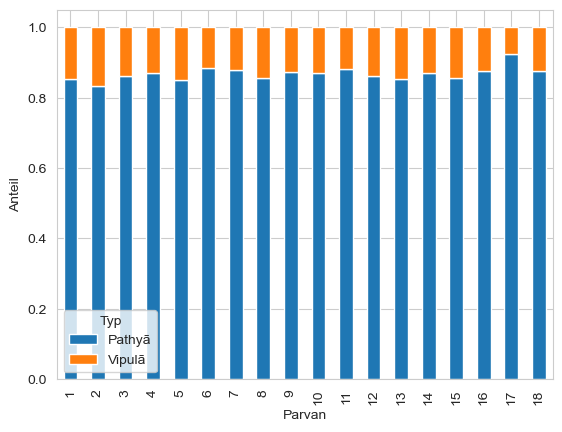

In [15]:
pd.crosstab(shlokas["Parvan"], shlokas["Typ"], 
            normalize="index").plot.bar(stacked=True, ylabel="Anteil")

In [16]:
contingency_parvan_type = pd.crosstab(shlokas["Parvan"], shlokas["Typ"])

scipy.stats.contingency.association(contingency_parvan_type
                                   ), chi2_p(contingency_parvan_type)

(0.034717414122089424, 2.000985906035392e-27)

In [17]:
shlokas["opening"] = shlokas["Quantitäten"].apply(lambda ls: ls[0:4])
shlokas["semi-cadence"] = shlokas["Quantitäten"].apply(lambda ls: ls[4:7])
shlokas["reopening"] = shlokas["Quantitäten"].apply(lambda ls: ls[8:12])
shlokas["cadence"] = shlokas["Quantitäten"].apply(lambda ls: ls[12:15])

## Welche _Vipulā_ gibt es?

In [18]:
# Vipulās
shlokas["semi-cadence"].value_counts()

⏑––    122240
⏑⏑⏑      7351
–––      5525
–⏑⏑      4479
–⏑–      1893
⏑–⏑       110
⏑⏑–        49
––⏑        11
Name: semi-cadence, dtype: int64

In [19]:
# Cadence
shlokas["cadence"].value_counts()

⏑–⏑    141554
––⏑       103
⏑⏑⏑         1
Name: cadence, dtype: int64

In [20]:
shlokas[shlokas["cadence"] == "⏑⏑⏑"]["Text"].tolist()

['prajāvāñ śrotriyo yajvā mukto divyais tribhir ṛṇaiḥ']

In [21]:
odd_cadences = shlokas[
    shlokas["cadence"].apply(lambda x: x != "⏑–⏑")
][["Text", "cadence"]]
write_table(odd_cadences, "odd_cadences", 
            caption="Verse mit unüblicher cadence.")
odd_cadences

,Text,cadence
Stelle,,
1.78.21a,pūjyāsi mama mānyā ca jyeṣṭhā śreṣṭhā ca brāhmaṇī,––⏑
1.145.26a,yatitaṃ vai mayā pūrvaṃ yathā tvaṃ vettha brāh...,––⏑
1.165.20a,balasthaś cāsi rājā ca bāhuvīryaś ca kṣatriyaḥ,––⏑
2.19.16a,ānahya carmaṇā tena sthāpayām āsa sve pure,––⏑
2.60.8c,kasyeśo naḥ parājaiṣīr iti tvām āha draupadī,––⏑
...,...,...
13.138.13a,agniṃ tvaṃ yajase nityaṃ kasmād arjuna brāhmaṇam,––⏑
13.140.6a,dānavair yudhi bhagnāḥ sma tathaiśvaryāc ca bh...,––⏑
14.34.12a,mano me brāhmaṇaṃ viddhi buddhiṃ me viddhi brā...,––⏑


In [22]:
odd_semi_cadences = shlokas[
    shlokas["semi-cadence"].apply(lambda x: x in ["⏑–⏑", "⏑⏑–", "––⏑"])
][["Text", "semi-cadence"]]
write_table(odd_semi_cadences, "odd_semi_cadences", 
            caption="Verse mit unüblicher semi-cadence.")
odd_semi_cadences

,Text,semi-cadence
Stelle,,
1.1.208c,samāgataiḥ surarṣibhis tulām āropitaṃ purā,⏑–⏑
1.10.4a,ekānarthān pṛthagarthān ekaduḥkhān pṛthaksukhān,⏑⏑–
1.57.93a,prahrādaśiṣyo nagnajit subalaś cābhavat tataḥ,––⏑
1.57.102a,prativindhyo yudhiṣṭhirāt sutasomo vṛkodarāt,⏑–⏑
1.92.13e,kulasya ye vaḥ prasthitās tatsādhutvam anuttamam,––⏑
...,...,...
13.105.46c,tūṣṇīṃgaṅgāṃ daśagaṅgāṃ mahāhradam athāpi ca,⏑⏑–
13.128.50a,yajñopavītadhāraṇaṃ yajño dharmakriyās tathā,⏑–⏑
14.7.22c,tāval lokān na labheyaṃ tyajeyaṃ saṃgataṃ yadi,⏑⏑–


In [23]:
df_no_pathya = shlokas[shlokas["semi-cadence"] != "⏑––"]
contingency_semi_cadence_parvan = pd.crosstab(df_no_pathya["Parvan"], df_no_pathya["semi-cadence"])


In [24]:
write_table(contingency_semi_cadence_parvan, "contingency_semi_cadence_parvan", 
            caption="Verteilung der einzelnen semi-cadences auf die Parvans.", 
            heatmap=True, axis="columns")
contingency_semi_cadence_parvan.style.background_gradient(axis="columns", cmap=cm)


semi-cadence,–––,––⏑,–⏑–,–⏑⏑,⏑–⏑,⏑⏑–,⏑⏑⏑
Parvan,,,,,,,
1,582,2,232,446,3,3,698
2,191,1,113,145,1,3,306
3,841,1,247,590,1,1,1060
4,200,0,41,101,0,0,111
5,523,3,183,329,7,5,586
6,300,1,136,314,2,4,470
7,548,0,195,539,1,4,688
8,243,0,93,272,0,4,358
9,185,0,76,221,0,1,361


In [25]:
scipy.stats.contingency.association(contingency_semi_cadence_parvan
                                   ), chi2_p(contingency_semi_cadence_parvan)

(0.0752535197065472, 1.7148117613962112e-82)

In [26]:
shlokas["semi-cadence"].value_counts(normalize=True) * 100 

⏑––    86.292338
⏑⏑⏑     5.189259
–––     3.900239
–⏑⏑     3.161840
–⏑–     1.336317
⏑–⏑     0.077652
⏑⏑–     0.034590
––⏑     0.007765
Name: semi-cadence, dtype: float64

In [27]:
shlokas["cadence"].value_counts(normalize=True) * 100 #/ pd.Series(dict(GGG=36.8, GLG=30.7, LGG=11.1, GGL=10.3, GLL=3.3, LGL=4.9))

⏑–⏑    99.926584
––⏑     0.072710
⏑⏑⏑     0.000706
Name: cadence, dtype: float64

In [28]:
sequences_at_positions = pd.DataFrame([
    shlokas["opening"].rename("2–4").str[1:].value_counts(normalize=True),
    shlokas["semi-cadence"].rename("5–7").value_counts(normalize=True),
    shlokas["reopening"].rename("10–12").str[1:].value_counts(normalize=True),
    shlokas["cadence"].rename("13–15").value_counts(normalize=True), 
])

In [29]:
write_table(sequences_at_positions, "sequences_at_positions", 
            caption="Häufigkeit metrischer Sequenzen an verschiedenen Positionen im Vers.", 
            heatmap=True, axis="columns")
sequences_at_positions.transpose().style.background_gradient(axis="rows", cmap=cm)

,2–4,5–7,10–12,13–15
⏑––,"0,24","0,86","0,27",–
–––,"0,22","0,04","0,25",–
–⏑–,"0,18","0,01","0,00",–
––⏑,"0,12","0,00","0,18","0,00"
⏑–⏑,"0,12","0,00","0,16","1,00"
–⏑⏑,"0,11","0,03","0,14",–
⏑⏑–,"0,00","0,00","0,00",–
⏑⏑⏑,"0,00","0,05","0,00","0,00"


In [30]:
shlokas["reopening"].value_counts()

–⏑––    23963
––––    20117
⏑–––    15684
–⏑–⏑    14689
–––⏑    14469
⏑⏑––    13949
––⏑⏑    11946
⏑––⏑    11361
⏑–⏑⏑     8047
⏑⏑–⏑     7311
⏑–⏑–      100
––⏑–       13
–⏑⏑⏑        5
⏑⏑⏑–        2
–⏑⏑–        1
⏑⏑⏑⏑        1
Name: reopening, dtype: int64

## Zusammenhänge zwischen _semi-cadence_ und _(re)opening_

In [31]:
contingency_semi_cadence_opening = pd.crosstab(shlokas["semi-cadence"], shlokas["opening"].str[1:]).sort_values("–⏑–", ascending=False)

In [32]:
write_table(contingency_semi_cadence_opening, "contingency_semi_cadence_opening", 
            caption="Häufigkeit der Kombinationen aus semi-cadence und opening.", 
            heatmap=True, axis="columns")
contingency_semi_cadence_opening.style.background_gradient(axis="columns", cmap=cm)

opening,–––,––⏑,–⏑–,–⏑⏑,⏑––,⏑–⏑,⏑⏑–,⏑⏑⏑
semi-cadence,,,,,,,,
⏑––,27633,17658,13176,16103,30360,17295,7,8
–––,50,7,5408,8,35,15,2,0
–⏑⏑,247,4,4107,1,116,2,2,0
⏑⏑⏑,2811,3,1658,0,2879,0,0,0
–⏑–,547,1,1104,0,237,1,3,0
⏑–⏑,5,1,100,2,2,0,0,0
⏑⏑–,23,1,11,0,13,1,0,0
––⏑,1,1,6,0,2,1,0,0


In [33]:
scipy.stats.contingency.association(contingency_semi_cadence_opening
                                   ), chi2_p(contingency_semi_cadence_opening)

(0.22979123888653924, 0.0)

In [34]:
contingency_semi_cadence_reopening = pd.crosstab(shlokas["reopening"], shlokas["semi-cadence"])
write_table(contingency_semi_cadence_reopening, "contingency_semi_cadence_reopening", 
            caption="Häufigkeit der Kombinationen aus semi-cadence und reopening.", 
            heatmap=True, axis="rows")

In [35]:
contingency_semi_cadence_reopening.style.background_gradient(axis="rows", cmap=cm)

semi-cadence,–––,––⏑,–⏑–,–⏑⏑,⏑––,⏑–⏑,⏑⏑–,⏑⏑⏑
reopening,,,,,,,,
––––,790,3,317,704,17184,5,11,1103
–––⏑,621,3,193,431,12469,1,2,749
––⏑–,1,0,1,0,11,0,0,0
––⏑⏑,444,1,138,372,10355,1,3,632
–⏑––,936,0,318,765,20672,2,9,1261
–⏑–⏑,545,0,175,441,12776,0,0,752
–⏑⏑–,0,0,0,0,1,0,0,0
–⏑⏑⏑,0,0,0,0,5,0,0,0
⏑–––,667,1,228,477,13469,5,13,824


In [36]:
scipy.stats.contingency.association(contingency_semi_cadence_reopening
                                   ), chi2_p(contingency_semi_cadence_reopening)

(0.2812632312324565, 0.0)

In [37]:
contingency_opening_reopening = pd.crosstab(shlokas["opening"], shlokas["reopening"])

In [38]:
contingency_opening_reopening.style.background_gradient(axis=None, cmap=cm)

reopening,––––,–––⏑,––⏑–,––⏑⏑,–⏑––,–⏑–⏑,–⏑⏑–,–⏑⏑⏑,⏑–––,⏑––⏑,⏑–⏑–,⏑–⏑⏑,⏑⏑––,⏑⏑–⏑,⏑⏑⏑–,⏑⏑⏑⏑
opening,,,,,,,,,,,,,,,,
––––,2742,1774,1,1457,2870,1700,0,2,2030,1303,1,916,1616,834,1,0
–––⏑,1381,963,0,838,1544,952,0,1,1102,736,2,526,858,432,0,0
––⏑–,1783,1280,3,947,2046,1212,0,0,1393,987,2,661,1317,614,1,0
––⏑⏑,1142,870,1,794,1531,936,0,0,954,724,3,488,887,467,0,0
–⏑––,3017,2227,5,1828,3671,2277,1,1,2266,1621,5,1231,2107,1113,0,0
–⏑–⏑,1586,1197,0,957,1952,1277,0,0,1239,986,1,693,1167,618,0,0
–⏑⏑–,2,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0
–⏑⏑⏑,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0
⏑–––,2076,1438,0,1158,2427,1456,0,0,1592,1062,2,748,1383,728,0,0


In [39]:
scipy.stats.contingency.association(contingency_opening_reopening
                                   ), chi2_p(contingency_opening_reopening)

(0.0219043140019184, 2.1061054867594805e-101)

In [40]:
opening_reopening = pd.DataFrame([
    shlokas["opening"].value_counts(),
    shlokas["reopening"].value_counts()
])
write_table(opening_reopening, "opening_reopening", 
            caption="Häufigkeitsvergleich der openings und reopenings", 
            heatmap=True, axis="columns")
opening_reopening.style.background_gradient(axis="columns", cmap=cm)

,–⏑––,––––,⏑–––,⏑–⏑–,⏑⏑––,––⏑–,–⏑–⏑,–––⏑,––⏑⏑,⏑––⏑,⏑–⏑⏑,⏑⏑–⏑,–⏑⏑–,–⏑⏑⏑,⏑⏑⏑–,⏑⏑⏑⏑
opening,21370,17247,14070,13324,12274,12246,11673,9335,8797,8341,7317,5642,9,6,5,2
reopening,23963,20117,15684,100,13949,13,14689,14469,11946,11361,8047,7311,1,5,2,1


# Einzelne _akṣara_ im Vers

In [41]:
shlokas["tmp_syllables"] = shlokas.apply(
    lambda row: [{
        "Silbe": syllable,
        "Position": pos_quantity[0],
        "Quantität": pos_quantity[1],
        "Silbenschema": syllable_symbols.replace(" ", "")
    } for pos_quantity, syllable, syllable_symbols in zip(
        enumerate(row["Quantitäten"], start=1),
        row["Silben"].split("."),
        row["Silbenschema"].split(".")
    )], axis=1
)
silbenweise = shlokas.explode("tmp_syllables")
for key in ["Position", "Quantität", "Silbe", "Silbenschema"]:
    silbenweise[key] = silbenweise["tmp_syllables"].apply(lambda x: x[key])
shlokas.drop(columns="tmp_syllables", inplace=True)

In [42]:
contingency_syllable_position = pd.crosstab(silbenweise["Silbenschema"], silbenweise["Position"])
write_table(contingency_syllable_position, "contingency_syllable_position", 
            caption="Häufigkeit der Silbenformen an den einzelnen Positionen", 
            heatmap=True, axis="rows")
contingency_syllable_position.style.background_gradient(axis="rows", cmap=cm)

Position,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Silbenschema,,,,,,,,,,,,,,,,
V,6,54,75,70,27,13,0,465,5,106,144,123,0,214,0,28209
VC,30215,36803,40122,38436,4390,49760,61263,31951,30128,34291,50001,31120,0,59295,0,26027
VCC,9403,13616,15470,14342,2333,20457,19461,19317,12615,12913,19259,12661,0,22588,0,0
VCCC,902,1538,1860,1492,239,2673,2381,2982,900,1725,2808,1380,0,1724,0,0
VCCCC,19,25,22,31,10,23,54,98,30,30,28,20,0,34,0,0
VCCCCC,3,1,3,0,0,33,0,1,3,0,7,0,0,0,0,0
v,296,396,263,261,268,42,0,963,130,426,328,572,594,0,0,27966
vC,60703,50594,41453,50852,129494,13737,11951,42808,56329,59498,19790,67257,140963,1,141658,59456
vCC,36673,34475,38148,33231,4505,48833,43111,36547,37730,29756,44330,25872,101,54242,0,0


In [43]:
pd.DataFrame(silbenweise["Silbenschema"].value_counts(normalize=True))

,Silbenschema
vC,0.417618
VC,0.231103
vCC,0.206286
VCC,0.085785
vCCC,0.021390
v,0.014341
V,0.013020
VCCC,0.009973
vCCCC,0.000272
VCCCC,0.000187


In [44]:
x = silbenweise
x[["Position ", "Pāda "]] = pd.DataFrame(x["Position"].apply(lambda x: ((x-1)%8+1, "ac" if x < 9 else "bd")).tolist(), index=x.index)
contingency_quantity_position = pd.crosstab([x["Pāda "], x["Quantität"]], x["Position "])
write_table(contingency_quantity_position, "contingency_quantity_position", 
            caption="Häufigkeit der Quantitäten an den einzelnen Vers-Positionen", 
            heatmap=True, axis="columns")

In [45]:
contingency_quantity_position.style.background_gradient(axis="columns", cmap=cm)

In [46]:
non_normalized = pd.crosstab(silbenweise["Quantität"], 
                             silbenweise["Position"])
scipy.stats.contingency.association(non_normalized
                                   ), chi2_p(non_normalized)

(0.6107560495366601, 0.0)

In [47]:
nur_guru = silbenweise[(silbenweise["Quantität"] == "–") & (silbenweise["Position"] < 9)]

In [48]:
contingency_semi_cadence_guru = pd.crosstab(
    nur_guru["semi-cadence"], 
    nur_guru["Position"],
).sort_values(1, ascending=False)
write_table(contingency_semi_cadence_guru, "contingency_semi_cadence_guru", 
            caption="Häufigkeit schwerer Silben, abhängig von der semi-cadence des Verses", 
            heatmap=True, axis="columns")

In [49]:
contingency_semi_cadence_guru.style.background_gradient(axis="columns", cmap=cm)

Position,1,2,3,4,5,6,7,8
semi-cadence,,,,,,,,
⏑––,70443,74570,92946,71176,0,122240,122240,81676
⏑⏑⏑,4345,4472,5693,7348,0,0,0,6975
–––,2565,5473,107,5495,5525,5525,5525,3624
–⏑⏑,2235,4359,369,4472,4479,0,0,4107
–⏑–,1048,1652,786,1891,1893,0,1893,1443
⏑⏑–,33,35,38,47,0,0,49,43
⏑–⏑,8,108,8,107,0,110,0,90
––⏑,6,8,5,9,11,11,0,10


In [50]:
scipy.stats.contingency.association(contingency_semi_cadence_guru
                                   ), chi2_p(contingency_semi_cadence_guru)

(0.18168131361665027, 0.0)

In [51]:
nur_guru

,Parvan,Adhyāya,Śloka,Pāda,Art,Text,Silben,Silbenschema,Quantitäten + Wortgrenzen,Quantitäten,...,opening,semi-cadence,reopening,cadence,tmp_syllables,Position,Quantität,Silbe,Position,Pāda
Stelle,,,,,,,,,,,,,,,,,,,,,
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,VC,––⏑–.⏑––⏑.⏑–.–⏑.⏑–⏑⏑,––⏑–⏑––⏑⏑––⏑⏑–⏑⏑,...,––⏑–,⏑––,⏑––⏑,⏑–⏑,"{'Silbe': 'Ar', 'Position': 1, 'Quantität': '–...",1,–,Ar,1,ac
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,VC,––⏑–.⏑––⏑.⏑–.–⏑.⏑–⏑⏑,––⏑–⏑––⏑⏑––⏑⏑–⏑⏑,...,––⏑–,⏑––,⏑––⏑,⏑–⏑,"{'Silbe': 'Ay', 'Position': 2, 'Quantität': '–...",2,–,Ay,2,ac
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,vCC,––⏑–.⏑––⏑.⏑–.–⏑.⏑–⏑⏑,––⏑–⏑––⏑⏑––⏑⏑–⏑⏑,...,––⏑–,⏑––,⏑––⏑,⏑–⏑,"{'Silbe': 'aM n', 'Position': 4, 'Quantität': ...",4,–,aM n,4,ac
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,vCC,––⏑–.⏑––⏑.⏑–.–⏑.⏑–⏑⏑,––⏑–⏑––⏑⏑––⏑⏑–⏑⏑,...,––⏑–,⏑––,⏑––⏑,⏑–⏑,"{'Silbe': 'ask', 'Position': 6, 'Quantität': '...",6,–,ask,6,ac
1.1.0a,1,1,0,a,Verse,nārāyaṇaṃ namaskṛtya naraṃ caiva narottamam,Ar.Ay.aN.aM n.am.ask.Rty.a n.ar.aM c.aiv.a n.a...,vCC,––⏑–.⏑––⏑.⏑–.–⏑.⏑–⏑⏑,––⏑–⏑––⏑⏑––⏑⏑–⏑⏑,...,––⏑–,⏑––,⏑––⏑,⏑–⏑,"{'Silbe': 'Rty', 'Position': 7, 'Quantität': '...",7,–,Rty,7,ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18.5.53a,18,5,53,a,Verse,mahābhāratam ākhyānaṃ yaḥ paṭhet susamāhitaḥ,ah.Abh.Ar.at.am .Akhy.An.aM y.aH p.aTh.et s.us...,vCC,⏑––⏑⏑.–––.–.⏑–.⏑⏑–⏑⏑,⏑––⏑⏑––––⏑–⏑⏑–⏑⏑,...,⏑––⏑,⏑––,–⏑–⏑,⏑–⏑,"{'Silbe': 'aM y', 'Position': 8, 'Quantität': ...",8,–,aM y,8,ac
18.5.53c,18,5,53,c,Verse,sa gacchet paramāṃ siddhim iti me nāsti saṃśayaḥ,a g.acch.et p.ar.am.AM s.iddh.im .it.i m.e n.A...,vCC,⏑.––.⏑⏑–.–⏑.⏑⏑.–.–⏑.–⏑⏑,⏑––⏑⏑––⏑⏑⏑––⏑–⏑⏑,...,⏑––⏑,⏑––,⏑⏑––,⏑–⏑,"{'Silbe': 'acch', 'Position': 2, 'Quantität': ...",2,–,acch,2,ac
18.5.53c,18,5,53,c,Verse,sa gacchet paramāṃ siddhim iti me nāsti saṃśayaḥ,a g.acch.et p.ar.am.AM s.iddh.im .it.i m.e n.A...,VCC,⏑.––.⏑⏑–.–⏑.⏑⏑.–.–⏑.–⏑⏑,⏑––⏑⏑––⏑⏑⏑––⏑–⏑⏑,...,⏑––⏑,⏑––,⏑⏑––,⏑–⏑,"{'Silbe': 'et p', 'Position': 3, 'Quantität': ...",3,–,et p,3,ac


In [52]:
# no effect to be seen, also tried with .reopening and .cadence
pd.crosstab(
    nur_guru["reopening"], 
    nur_guru["Position"]
).sort_values(by=1,ascending=False).style.background_gradient(axis="columns", cmap=cm)

Position,1,2,3,4,5,6,7,8
reopening,,,,,,,,
–⏑––,13619,15372,16833,15276,2019,21610,21935,16929
––––,11653,13066,14428,13276,1814,17982,18302,13952
⏑–––,8986,10230,11063,10154,1373,14142,14377,10645
–⏑–⏑,8357,9222,10403,9222,1161,13321,13496,10223
–––⏑,8311,9146,10295,9326,1248,13094,13285,9833
⏑⏑––,7952,8966,9712,8843,1093,12673,12847,9402
––⏑⏑,6821,7632,8458,7559,955,10801,10940,8174
⏑––⏑,6359,7267,7907,7124,1004,10254,10384,7897
⏑–⏑⏑,4516,5046,5683,5019,651,7251,7367,5718


In [53]:
effects_ac = np.ndarray((8,8))
effects_bd = np.ndarray((8,8))

for i in range(8):
    for j in range(8):
        contingency_ac = pd.crosstab(
            shlokas["Quantitäten"].str[i], 
            shlokas["Quantitäten"].str[j]
        )
        contingency_bd = pd.crosstab(
            shlokas["Quantitäten"].str[i+8], 
            shlokas["Quantitäten"].str[j+8]
        )
        if chi2_p(contingency_ac) < SIGNIFICANCE:
            effects_ac[i, j] = scipy.stats.contingency.association(contingency_ac) 
        else:
            effects_ac[i, j] = np.nan
        if chi2_p(contingency_bd) < SIGNIFICANCE:
            effects_bd[i, j] = scipy.stats.contingency.association(contingency_bd) 
        else:
            effects_bd[i, j] = np.nan

In [54]:
cross_syllable_effects_ac = pd.DataFrame(effects_ac).rename(index=lambda x: x+1, columns=lambda x: x+1)
write_table(cross_syllable_effects_ac, "cross_syllable_effects_ac", 
            caption="Zusammenhänge zwischen den Quantitäten einzelner Silben " 
                    "(ungerade Pāda, Cramérs $V$, nur signifikante Effekte: $p < 0.01$)", 
            heatmap=True, axis=None)

In [55]:
cross_syllable_effects_ac.style.background_gradient(axis=None, cmap=cm)

,1,2,3,4,5,6,7,8
1,"1,00","0,12","0,08","0,02","0,05","0,01","0,01","0,01"
2,"0,12","1,00","0,48","0,03","0,21","0,08","0,07","0,01"
3,"0,08","0,48","1,00","0,03","0,40","0,15","0,13","0,04"
4,"0,02","0,03","0,03","1,00","0,23","0,25","0,23",–
5,"0,05","0,21","0,40","0,23","1,00","0,45","0,32","0,05"
6,"0,01","0,08","0,15","0,25","0,45","1,00","0,91","0,16"
7,"0,01","0,07","0,13","0,23","0,32","0,91","1,00","0,16"
8,"0,01","0,01","0,04",–,"0,05","0,16","0,16","1,00"


In [56]:
cross_syllable_effects_bd = pd.DataFrame(effects_bd).rename(index=lambda x: x+1, columns=lambda x: x+1)
write_table(cross_syllable_effects_bd, "cross_syllable_effects_bd", 
            caption="Zusammenhänge zwischen den Quantitäten einzelner Silben " 
                    "(gerade Pāda, Cramérs $V$, nur signifikante Effekte: $p < 0.01$)", 
            heatmap=True, axis=None)

In [57]:
cross_syllable_effects_bd.style.background_gradient(axis=None, cmap=cm)

,1,2,3,4,5,6,7,8
1,"1,00","0,08",–,"0,01",–,–,–,–
2,"0,08","1,00","0,35","0,19",–,–,–,–
3,–,"0,35","1,00","0,42",–,–,–,–
4,"0,01","0,19","0,42","1,00","0,01",–,–,–
5,–,–,–,"0,01","1,00",–,–,–
6,–,–,–,–,–,"1,00",–,–
7,–,–,–,–,–,–,–,–
8,–,–,–,–,–,–,–,"1,00"


In [58]:
cross_syllable_effects_bd.style.background_gradient(axis=None, cmap=cm)

,1,2,3,4,5,6,7,8
1,"1,00","0,08",–,"0,01",–,–,–,–
2,"0,08","1,00","0,35","0,19",–,–,–,–
3,–,"0,35","1,00","0,42",–,–,–,–
4,"0,01","0,19","0,42","1,00","0,01",–,–,–
5,–,–,–,"0,01","1,00",–,–,–
6,–,–,–,–,–,"1,00",–,–
7,–,–,–,–,–,–,–,–
8,–,–,–,–,–,–,–,"1,00"


In [59]:
counts_laghu = np.ndarray((16,16))
counts_guru = np.ndarray((16,16))

for i in range(16):
    for j in range(16):
        try:
            counts_laghu[i, j] = shlokas[
                shlokas["Quantitäten"].str[i] == "⏑"
            ]["Quantitäten"].str[j].value_counts(normalize=True)["–"]
        except:
            counts_laghu[i, j] = 0
        try:
            counts_guru[i, j] = shlokas[
                shlokas["Quantitäten"].str[i] == "–"
            ]["Quantitäten"].str[j].value_counts(normalize=True)["–"]
        except:
            counts_guru[i, j] = 0

In [60]:
conditioned_syllable_laghu = pd.DataFrame(counts_laghu).rename(
    index=lambda x: f"{x+1}=⏑", columns=lambda x: f"→{x+1}=–"
)
write_table(conditioned_syllable_laghu, "conditioned_syllable_laghu", 
            caption="Bedingte Wahrscheinlichkeiten für schwere Silben, "
                    "abhängig von einer bestimmten leichten Silbe",
            heatmap=True, axis=None)
conditioned_syllable_laghu.style.background_gradient(axis=None, cmap=cm)

,→1=–,→2=–,→3=–,→4=–,→5=–,→6=–,→7=–,→8=–,→9=–,→10=–,→11=–,→12=–,→13=–,→14=–,→15=–,→16=–
1=⏑,"0,00","0,71","0,66","0,65","0,10","0,90","0,91","0,70","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,38"
2=⏑,"0,65","0,00","1,00","0,66","0,01","0,94","0,94","0,68","0,60","0,57","0,86","0,51","0,00","1,00","0,00","0,38"
3=⏑,"0,50","1,00","0,00","0,61","0,26","0,83","0,86","0,72","0,59","0,57","0,86","0,52","0,00","1,00","0,00","0,38"
4=⏑,"0,58","0,66","0,68","0,00","0,00","1,00","1,00","0,69","0,60","0,57","0,85","0,51","0,00","1,00","0,00","0,38"
5=⏑,"0,58","0,61","0,76","0,61","0,00","0,94","0,94","0,68","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,38"
6=⏑,"0,56","0,76","0,50","1,00","0,46","0,00","0,14","0,91","0,61","0,59","0,86","0,53","0,00","1,00","0,00","0,39"
7=⏑,"0,55","0,75","0,51","1,00","0,38","0,01","0,00","0,94","0,60","0,59","0,85","0,53","0,00","1,00","0,00","0,39"
8=⏑,"0,58","0,63","0,73","0,64","0,06","0,97","0,98","0,00","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,37"
9=⏑,"0,57","0,64","0,70","0,64","0,08","0,90","0,92","0,69","0,00","0,62","0,86","0,53","0,00","1,00","0,00","0,38"
10=⏑,"0,57","0,64","0,70","0,63","0,08","0,91","0,92","0,70","0,65","0,00","1,00","0,63","0,00","1,00","0,00","0,38"


In [61]:
conditioned_syllable_guru = pd.DataFrame(counts_guru).rename(
    index=lambda x: f"{x+1}=–", columns=lambda x: f"→{x+1}=–"
)
write_table(conditioned_syllable_guru, "conditioned_syllable_guru", 
            caption="Bedingte Wahrscheinlichkeiten für schwere Silben, "
                    "abhängig von einer bestimmten leichten Silbe",
            heatmap=True, axis=None)
conditioned_syllable_guru.style.background_gradient(axis=None, cmap=cm)

,→1=–,→2=–,→3=–,→4=–,→5=–,→6=–,→7=–,→8=–,→9=–,→10=–,→11=–,→12=–,→13=–,→14=–,→15=–,→16=–
1=–,"1,00","0,59","0,74","0,63","0,07","0,91","0,92","0,69","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,39"
2=–,"0,53","1,00","0,54","0,63","0,13","0,88","0,90","0,70","0,60","0,58","0,86","0,53","0,00","1,00","0,00","0,38"
3=–,"0,60","0,49","1,00","0,65","0,01","0,93","0,94","0,68","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,38"
4=–,"0,56","0,63","0,72","1,00","0,13","0,85","0,87","0,69","0,60","0,58","0,86","0,53","0,00","1,00","0,00","0,39"
5=–,"0,49","0,97","0,11","1,00","1,00","0,46","0,62","0,77","0,60","0,59","0,86","0,53","0,00","1,00","0,00","0,39"
6=–,"0,57","0,63","0,73","0,60","0,04","1,00","1,00","0,67","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,38"
7=–,"0,57","0,63","0,72","0,61","0,06","0,99","1,00","0,67","0,60","0,58","0,86","0,52","0,00","1,00","0,00","0,38"
8=–,"0,57","0,64","0,69","0,64","0,09","0,87","0,89","1,00","0,60","0,57","0,86","0,52","0,00","1,00","0,00","0,39"
9=–,"0,57","0,64","0,71","0,64","0,08","0,90","0,92","0,69","1,00","0,55","0,86","0,52","0,00","1,00","0,00","0,38"
10=–,"0,57","0,64","0,71","0,64","0,09","0,90","0,91","0,69","0,57","1,00","0,75","0,44","0,00","1,00","0,00","0,38"


In [62]:
def cross_examine(position1, position2):
    return pd.crosstab(
        shlokas["Quantitäten"].str[position1-1].rename(position1), 
        shlokas["Quantitäten"].str[position2-1].rename(position2)
    )

In [63]:
cross_examine(3,5) 

5,–,⏑
3,,
–,1267,98685
⏑,10641,31065


In [64]:
# Piṅgala Syllables 2 and 3
cross_examine(2, 3)

3,–,⏑
2,,
–,48993,41684
⏑,50959,22


In [65]:
cross_examine(10,11)

11,–,⏑
10,,
–,61631,20106
⏑,59912,9


In [66]:
cross_examine(11,12)

12,–,⏑
11,,
–,73713,47830
⏑,116,19999


In [67]:
shlokas["Quantitäten"].str[1:3].value_counts()

⏑–    50959
––    48993
–⏑    41684
⏑⏑       22
Name: Quantitäten, dtype: int64

In [68]:
shlokas["Quantitäten"].str[9:12].value_counts()

⏑––    37912
–––    35801
––⏑    25830
⏑–⏑    22000
–⏑⏑    19993
–⏑–      113
⏑⏑⏑        6
⏑⏑–        3
Name: Quantitäten, dtype: int64

In [69]:
effects_quarter = np.ndarray((4,4))
quarters = ["opening", "semi-cadence", "reopening", "cadence"]
for i, quarter_i in enumerate(quarters):
    for j, quarter_j in enumerate(quarters):
        contingency = pd.crosstab(
            shlokas[quarter_i],
            shlokas[quarter_j]
        )
        if chi2_p(contingency) < SIGNIFICANCE:      
            effects_quarter[i, j] = scipy.stats.contingency.association(contingency) 
        else:
            effects_quarter[i, j] = np.nan

In [70]:
cross_quarter_effects = pd.DataFrame(effects_quarter).rename(index=lambda x: quarters[x], 
                                                             columns=lambda x: quarters[x])
write_table(cross_quarter_effects, "cross_quarter_effects", 
            caption="Zusammenhänge zwischen den Quantitäten einzelner Viertel "
                    "(Cramérs $V$, nur signifikante Effekte: $p < 0.01$)", 
            heatmap=True, axis=None)
cross_quarter_effects.style.background_gradient(axis=None, cmap=cm)

,opening,semi-cadence,reopening,cadence
opening,"1,00","0,23","0,02",–
semi-cadence,"0,23","1,00","0,28",–
reopening,"0,02","0,28","1,00",–
cadence,–,–,–,"1,00"


# Wortgrenzen und Zäsuren

In [71]:
def enumerate_sublists(lists):
    index = 1
    result = []
    for element in lists:
        result.append((index, element))
        index += len(element)
    return result

In [72]:
shlokas["tmp_words"] = shlokas.apply(
    lambda row: [{
        "Wort": word, 
        "Position": pos_sequence[0], 
        "Sequenz": pos_sequence[1]
    } for pos_sequence, word in zip(
        enumerate_sublists(row["Quantitäten + Wortgrenzen"].split(".")), 
        row["Text"].split(" ")
    )], axis=1)
wortweise = shlokas.explode("tmp_words")
for key in ["Position", "Sequenz", "Wort"]:
    wortweise[key] = wortweise["tmp_words"].apply(lambda x: x[key])
wortweise["Position "] = (wortweise["Position"] - 1) % 8 + 1
wortweise["Pāda "] = wortweise["Position"].apply(lambda position: "bd" if position > 8 else "ac")
shlokas.drop(columns="tmp_words", inplace=True)

In [73]:
break_positions = pd.crosstab(wortweise["Pāda "], wortweise["Position "])

write_table(break_positions, "break_positions", 
            caption="Häufigkeit von Wortgrenzen an einer bestimmten Position",
            heatmap=True, axis=None)


break_positions.style.background_gradient(axis=None, cmap=cm)

Position,1,2,3,4,5,6,7,8
Pāda,,,,,,,,
ac,141658,18376,49901,53286,52218,38183,56537,15508
bd,141562,11203,45997,54368,55176,31554,36033,8313


In [74]:
wortweise[wortweise.Position > 8].Position.count()

384206

In [75]:
wortweise[wortweise.Position <= 8].Position.count()

425667

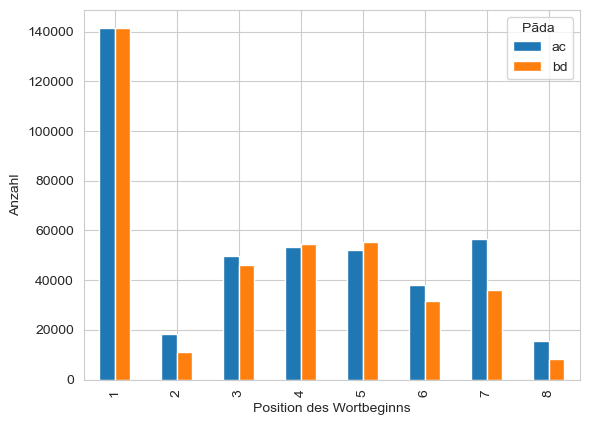

In [76]:
pd.crosstab(wortweise["Position "], wortweise["Pāda "]).plot.bar(xlabel="Position des Wortbeginns", 
                                                           ylabel="Anzahl")
write_figure("caesura")

In [77]:
def break_patterns(quantities):
    all_indices = [(k-1) for k, v in enumerate_sublists(quantities.split("."))]
    first_half = [i for i in all_indices if i < 8]
    second_half = [i%8 for i in all_indices if i >= 8]
    return [
        "".join(str(i) if i in first_half else "–" for i in range(1,8)),
        "".join(str(i) if i in second_half else "–" for i in range(1,8)),
    ]

In [78]:
df = pd.DataFrame(shlokas["Quantitäten + Wortgrenzen"].rename("halves").apply(break_patterns))
df[["1–8", "9–16"]] = pd.DataFrame(df["halves"].tolist(), index=df.index)
df["1–4"] = df["1–8"].str[0:4]
df["5–7"] = df["1–8"].str[4:8]
df["9–12"] = df["9–16"].str[0:4]
df["13–15"] = df["9–16"].str[4:8]

In [79]:
df["13–15"].value_counts()["–6–"], df["5–7"].value_counts()["–6–"]

(31792, 48846)

In [80]:
cross_breaks_odd = pd.crosstab(df["1–4"], df["5–7"])

write_table(cross_breaks_odd, "cross_breaks_odd", 
            caption="Wortgrenzenmuster (ungerade pādas)", 
            heatmap=True, axis=None)

cross_breaks_odd.style.background_gradient(axis=None, cmap=cm)

5–7,567,56–,5–7,5––,–67,–6–,––7,–––
1–4,,,,,,,,
1234,0,5,2,13,3,40,14,34
123–,0,25,14,95,39,364,19,186
12–4,1,38,48,110,33,659,85,965
12––,2,101,75,758,76,856,68,441
1–34,1,29,14,79,12,275,33,290
1–3–,9,104,100,1025,115,2690,335,1783
1––4,1,62,35,256,46,1045,135,1500
1–––,1,149,121,1411,37,675,62,422
–234,2,7,16,64,15,270,38,411


In [81]:
cross_breaks_even = pd.crosstab(df["9–12"], df["13–15"])

write_table(cross_breaks_even, "cross_breaks_even", 
            caption="Wortgrenzenmuster (gerade pādas)", 
            heatmap=True, axis=None)

cross_breaks_even.style.background_gradient(axis=None, cmap=cm)

13–15,567,56–,5–7,5––,–67,–6–,––7,–––
9–12,,,,,,,,
1234,1,1,0,3,0,15,6,55
123–,0,14,4,111,3,123,7,212
12–4,0,20,5,86,6,329,35,990
12––,2,64,16,624,10,396,7,272
1–34,0,17,3,124,2,109,33,329
1–3–,1,76,55,726,55,1119,133,1786
1––4,2,32,18,213,8,421,76,1139
1–––,3,124,33,611,3,257,14,188
–234,0,7,1,42,9,112,27,470


In [82]:
w = wortweise[wortweise["Position"] < 9]
contingency_semi_cadence_break_position = pd.crosstab(
    w["semi-cadence"], 
    w["Position"]
).sort_values(1, ascending=False)
write_table(contingency_semi_cadence_break_position, "contingency_semi_cadence_break_position", 
            caption="Häufigkeit eines Wortanfangs, abhängig von der semi-cadence", 
            heatmap=True, axis="columns")

In [83]:
contingency_semi_cadence_break_position.style.background_gradient(axis="columns", cmap=cm)

Position,1,2,3,4,5,6,7,8
semi-cadence,,,,,,,,
⏑––,122240,15770,42998,49071,45508,26302,54322,14198
⏑⏑⏑,7351,819,2835,1582,3169,3621,834,104
–––,5525,844,1973,1617,310,5438,503,855
–⏑⏑,4479,748,1388,916,1321,2708,709,90
–⏑–,1893,159,650,63,1831,47,152,252
⏑–⏑,110,33,41,31,27,54,14,5
⏑⏑–,49,2,13,1,47,4,1,4
––⏑,11,1,3,5,5,9,2,0


In [84]:
scipy.stats.contingency.association(contingency_semi_cadence_break_position
                                   ), chi2_p(contingency_semi_cadence_break_position)

(0.09525304420766594, 0.0)

In [85]:
runover_shlokas = shlokas[shlokas["Quantitäten + Wortgrenzen"].apply(lambda qs: not any(i == 9 for i, _ in enumerate_sublists(qs.split("."))))][["Text"]]
write_table(runover_shlokas, "runover_shlokas", caption="Verse ohne Wortgrenze an der Pādagrenze")
runover_shlokas

,Text
Stelle,
1.2.195e,praṇītaṃ sajjanamanovaiklavyāśrupravartakam
1.3.143c,aham airāvatajyeṣṭhabhrātṛbhyo 'karavaṃ namaḥ
1.4.4c,manuṣyoragagandharvakathā veda ca sarvaśaḥ
1.19.8a,ghoraṃ jalacarārāvaraudraṃ bhairavanisvanam
1.19.11c,varāharūpiṇā cāntarvikṣobhitajalāvilam
...,...
14.58.10a,pramattamattasaṃmattakṣveḍitotkṛṣṭasaṃkulā
14.59.3c,bhīṣmakarṇakṛpadroṇaśalyādibhir anuttamam
14.60.4c,ācakṣva kṛṣṇa saubhadravadham ity apatad bhuvi


In [86]:
positions = wortweise[wortweise["Position"] < 9]["Position"].unique()

def word_break_at(position, qs):
    for index, sublist in enumerate_sublists(qs.split(".")):
        if index == position:
            return True
    return False

effects_break = np.zeros(positions.size)
for position in positions:
    contingency = pd.crosstab(
        shlokas["semi-cadence"],
        shlokas["Quantitäten + Wortgrenzen"].apply(lambda qs: word_break_at(position, qs))
    )
    if chi2_p(contingency) < SIGNIFICANCE:
        effects_break[position-1] = scipy.stats.contingency.association(contingency) 
    else:
        effects_break[position-1] = np.nan

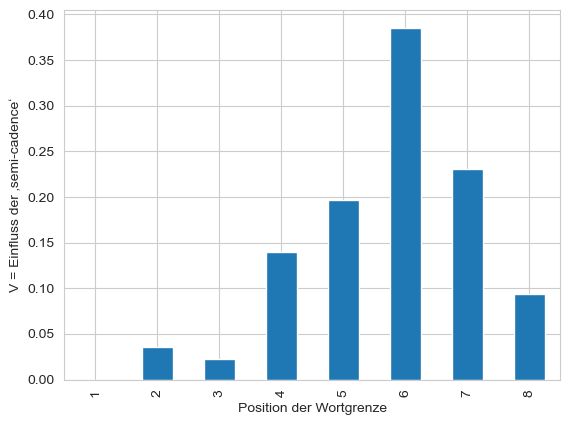

In [87]:
pd.Series(effects_break, index=range(1,8+1)).plot.bar(xlabel="Position der Wortgrenze", 
                                                        ylabel="V = Einfluss der ‚semi-cadence‘")
write_figure("effect-caesura")

In [88]:
most_frequent_word_types = wortweise["Sequenz"].value_counts().head(50)
most_frequent_word_types

––        116568
⏑–         74269
⏑          62565
–          59867
–⏑–        46523
–⏑         45352
⏑⏑         38475
⏑⏑–        35444
–––        30005
––⏑        26636
⏑–⏑⏑       25003
⏑––        21142
–⏑⏑        19606
–⏑––       18982
⏑–⏑–       16988
⏑–––       16427
⏑–⏑        11461
⏑––⏑       10532
⏑⏑––        8245
⏑⏑–⏑⏑       8075
––⏑–        7643
–⏑–⏑⏑       6303
–⏑⏑–        6045
–⏑–⏑        5718
–⏑––⏑       5555
––––        4995
⏑⏑⏑–        4454
⏑⏑–⏑–       4213
⏑⏑––⏑       4040
⏑⏑–⏑        3808
–⏑–⏑–       3689
–⏑–––       3467
            2885
⏑⏑–––       2726
⏑⏑⏑         2344
–––⏑        2248
–⏑–⏑⏑–      1741
––⏑––       1688
⏑–⏑––       1604
–⏑⏑–⏑⏑      1419
––⏑⏑⏑–      1399
––––⏑       1348
––⏑⏑        1215
⏑⏑⏑–⏑⏑      1144
––⏑–⏑⏑      1128
–⏑––⏑–      1087
⏑–⏑⏑⏑–      1076
⏑–––⏑       1013
––⏑–⏑–      1000
–⏑⏑–⏑–       997
Name: Sequenz, dtype: int64

In [89]:
wortweise["Sequenz"].value_counts().head(50).sum() / wortweise["Sequenz"].count()

0.9633078272766223

In [90]:
frequent_wortweise = wortweise[wortweise["Sequenz"].apply(lambda s: s in most_frequent_word_types.index.tolist())]
contingency_sequence_position = pd.crosstab(
    [frequent_wortweise["Sequenz"], frequent_wortweise["Pāda "]],
    frequent_wortweise["Position "]
)
write_table(contingency_sequence_position, "contingency_sequence_position", 
            caption="Lokalisierung der 50 häufigsten metrischen Worttypen im Vers", 
            heatmap=True, axis=None)

In [91]:
# TODO sort metrical sequences by frequency

In [92]:
small_words = wortweise[wortweise["Wort"].apply(lambda x: x in["ca", "tu", "hi", "na", "tv", "hy", "cana", "api", "eva", "iva"])]

In [93]:
contingency_sequence_position.sum(axis=1).sort_values(ascending=False).index

MultiIndex([(    '––', 'ac'),
            (    '⏑–', 'bd'),
            (     '–', 'ac'),
            (     '⏑', 'ac'),
            (    '⏑–', 'ac'),
            (    '––', 'bd'),
            (    '⏑⏑', 'bd'),
            (   '–⏑–', 'bd'),
            (    '–⏑', 'ac'),
            (     '⏑', 'bd'),
            (  '⏑–⏑⏑', 'bd'),
            (     '–', 'bd'),
            (   '–––', 'ac'),
            (   '⏑⏑–', 'ac'),
            (   '–⏑–', 'ac'),
            (   '–⏑⏑', 'bd'),
            (    '–⏑', 'bd'),
            (   '––⏑', 'ac'),
            (   '⏑⏑–', 'bd'),
            (  '⏑–––', 'ac'),
            (  '⏑–⏑–', 'bd'),
            (   '⏑––', 'ac'),
            (  '–⏑––', 'ac'),
            (   '–––', 'bd'),
            (   '––⏑', 'bd'),
            (   '⏑––', 'bd'),
            (  '–⏑––', 'bd'),
            (  '⏑––⏑', 'ac'),
            (    '⏑⏑', 'ac'),
            ( '⏑⏑–⏑⏑', 'bd'),
            ( '–⏑–⏑⏑', 'bd'),
            (   '⏑–⏑', 'bd'),
            (   '⏑–⏑', 'ac'),
          

In [94]:
scipy.stats.contingency.association(contingency_sequence_position
                                   ), chi2_p(contingency_sequence_position)

(0.5708596180305742, 0.0)

# Piṅgalas Verbote

In [95]:
short23 = shlokas[
    (shlokas.reopening.str[1:3] == "⏑⏑") | (shlokas.opening.str[1:3] == "⏑⏑")
][["Text", "Quantitäten"]]
write_table(short23, "short23", caption="Verse mit Doppelkürze in der Mitte des (re)openings")
short23

,Text,Quantitäten
Stelle,,
1.2.158c,adhyāyānāṃ śataṃ proktaṃ saptadaśa tathāpare,––––⏑––––⏑⏑⏑⏑–⏑–
1.2.234a,etad akhilam ākhyātaṃ bhārataṃ parvasaṃgrahāt,–⏑⏑⏑⏑––––⏑––⏑–⏑–
1.39.29c,yad gṛhītaṃ phalaṃ rājñā tatra kṛmir abhūd aṇuḥ,–⏑––⏑––––⏑⏑⏑⏑–⏑⏑
1.99.41a,katham arājakaṃ rāṣṭraṃ śakyaṃ dhārayituṃ prabho,⏑⏑⏑–⏑––––––⏑⏑–⏑–
1.158.14a,na kuṇapāḥ śṛṅgiṇo vā na devā na ca mānuṣāḥ,⏑⏑⏑––⏑––⏑––⏑⏑–⏑–
2.10.4a,raśmivatī bhāsvarā ca divyagandhā manoramā,–⏑⏑––⏑–⏑–⏑––⏑–⏑–
2.19.10a,aparihāryā meghānāṃ māgadheyaṃ maṇeḥ kṛte,⏑⏑⏑––––––⏑––⏑–⏑–
3.222.36c,nāpi parivade śvaśrūṃ sarvadā pariyantritā,–⏑⏑⏑⏑––––⏑–⏑⏑–⏑–
3.222.39c,nāpi parivade cāhaṃ tāṃ pṛthāṃ pṛthivīsamām,–⏑⏑⏑⏑––––⏑–⏑⏑–⏑–


In [96]:
reopening_glg = shlokas[(shlokas.reopening.str[1:4] == "–⏑–")][["Text", "Quantitäten"]]
write_table(reopening_glg, "reopening_glg", caption="Verse mit der Sequenz –⏑– vor der Kadenz")
reopening_glg
# Interessant auch die Verteilung auf die Parvans: ["parva"].value_counts()

,Text,Quantitäten
Stelle,,
2.47.9a,indrakṛṣṭair vartayanti dhānyair nadīmukhaiś c...,–⏑–––⏑–⏑––⏑–⏑–⏑–
3.17.19c,cikṣepa tarasā vīro vyāvidhya satyavikramaḥ,––⏑⏑⏑–––––⏑–⏑–⏑⏑
3.104.7c,vaśe ca kṛtvā rājño 'nyān svarājyam anvaśāsata,⏑–⏑–––––⏑–⏑–⏑–⏑⏑
3.188.61a,dasyuprapīḍitā rājan kākā iva dvijottamāḥ,––⏑–⏑–––––⏑–⏑–⏑–
4.32.8a,tau nihatya pṛthag dhuryāv ubhau ca pārṣṇisārathī,–⏑–⏑⏑–––⏑–⏑–⏑–⏑–
...,...,...
13.101.23a,yajñiyānāṃ ca vṛkṣāṇām ayajñiyān nibodha me,–⏑––⏑–––⏑–⏑–⏑–⏑–
13.109.55c,vyādhitasyauṣadhagrāmaḥ kruddhasya ca prasādanam,–⏑––⏑–––––⏑–⏑–⏑⏑
13.151.8c,nāradaḥ parvataś caiva viśvāvasur hahāhuhūḥ,–⏑––⏑––⏑––⏑–⏑–⏑–


# Moren (_mātrā_)

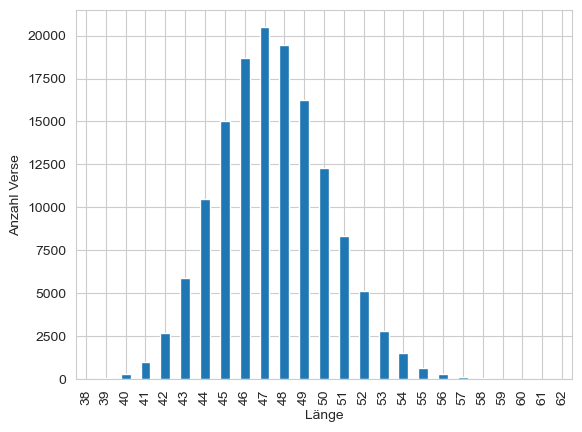

In [97]:
shlokas["Länge"] = shlokas["Silbenschema"].apply(lambda sc: sum(2 if x == "V" else 0 if x == "." else 1 for x in sc))
shlokas["Länge"].value_counts().sort_index().plot.bar(xlabel="Länge", ylabel="Anzahl Verse")
write_figure("verse-lengths")

In [98]:
shlokas["Länge"].mean(), shlokas["Länge"].std()

(47.421042228465744, 2.773753112326408)

In [99]:
shlokas.sort_values(by="Länge")[["Text", "Quantitäten", "Länge"]].iloc[np.r_[0:8, -8:0]]

,Text,Quantitäten,Länge
Stelle,,,
13.16.14a,viśvāvasuhiraṇyākṣapuruhūtanamaskṛta,––⏑⏑⏑––⏑⏑⏑–⏑⏑–⏑⏑,38
7.113.25e,nipātitadhvajarathaṃ hatavājinaradvipam,⏑–⏑–⏑⏑⏑–⏑⏑–⏑⏑–⏑⏑,38
3.146.26a,abhirāmanadīkuñjanirjharodarakandaram,⏑⏑–⏑⏑––⏑–⏑–⏑⏑–⏑⏑,38
7.85.75a,śaraśaktidhvajavanaṃ hayanāgasamākulam,⏑⏑––⏑⏑⏑–⏑⏑–⏑⏑–⏑⏑,38
9.45.74c,pulinatrastavihagaṃ viniṣpatitapannagam,⏑⏑––⏑⏑⏑–⏑–⏑⏑⏑–⏑⏑,38
3.166.9c,tathā śūlāsiparaśugadāmusalapāṇayaḥ,⏑–––⏑⏑⏑⏑⏑–⏑⏑⏑–⏑⏑,38
6.20.19a,mahārathaughavipulaḥ samudra iva parvaṇi,⏑–⏑–⏑⏑⏑–⏑–⏑⏑⏑–⏑⏑,38
15.45.10a,vanavāsanivṛtteṣu bhavatsu kurunandana,⏑⏑–⏑⏑––⏑⏑–⏑⏑⏑–⏑⏑,38
6.23.26c,ācāryān mātulān bhrātqn putrān pautrān sakhīṃs...,––––⏑–––––––⏑–⏑–,60


# Einfluss auf den nächsten Vers?

In [100]:
previous_next = pd.DataFrame([shlokas["Quantitäten"].rename("previous").reset_index(drop=True), shlokas["Quantitäten"][1:].reset_index(drop=True).rename("next")]).transpose()

In [101]:
effects_quarter = np.ndarray((4,4))
quarters = ["opening", "semi-cadence", "reopening", "cadence"]

def index_with(quarter, string):
    if quarter == "opening":
        return string[0:4]
    elif quarter == "semi-cadence":
        return string[4:7]
    elif quarter == "reopening":
        return string[8:12]
    elif quarter == "cadence":
        return string[12:15]

for i, quarter_i in enumerate(quarters):
    for j, quarter_j in enumerate(quarters):
        contingency = pd.crosstab(
            index_with(quarter_i, previous_next["previous"].str),
            index_with(quarter_j, previous_next["next"].str)
        )
        if chi2_p(contingency) < SIGNIFICANCE:      
            effects_quarter[i, j] = scipy.stats.contingency.association(contingency) 
        else:
            effects_quarter[i, j] = np.nan

In [102]:
cross_quarter_effects = pd.DataFrame(effects_quarter).rename(index=lambda x: quarters[x] + "(1)", 
                                                             columns=lambda x: quarters[x] + "(2)")
cross_quarter_effects

,opening(2),semi-cadence(2),reopening(2),cadence(2)
opening(1),0.016369,0.024885,0.020421,NaN
semi-cadence(1),0.025581,0.261380,0.274019,NaN
reopening(1),0.019803,0.273964,0.196871,NaN
cadence(1),NaN,NaN,NaN,0.013226
